In [1]:
from maelzel.core import *


In [2]:
import maelzel.partialtracking as pt
import maelzel.transcribe.spectral as trsp
from maelzel.snd.audiosample import Sample
%matplotlib qt

Sample(dur=6.0, sr=48000, ch=1)
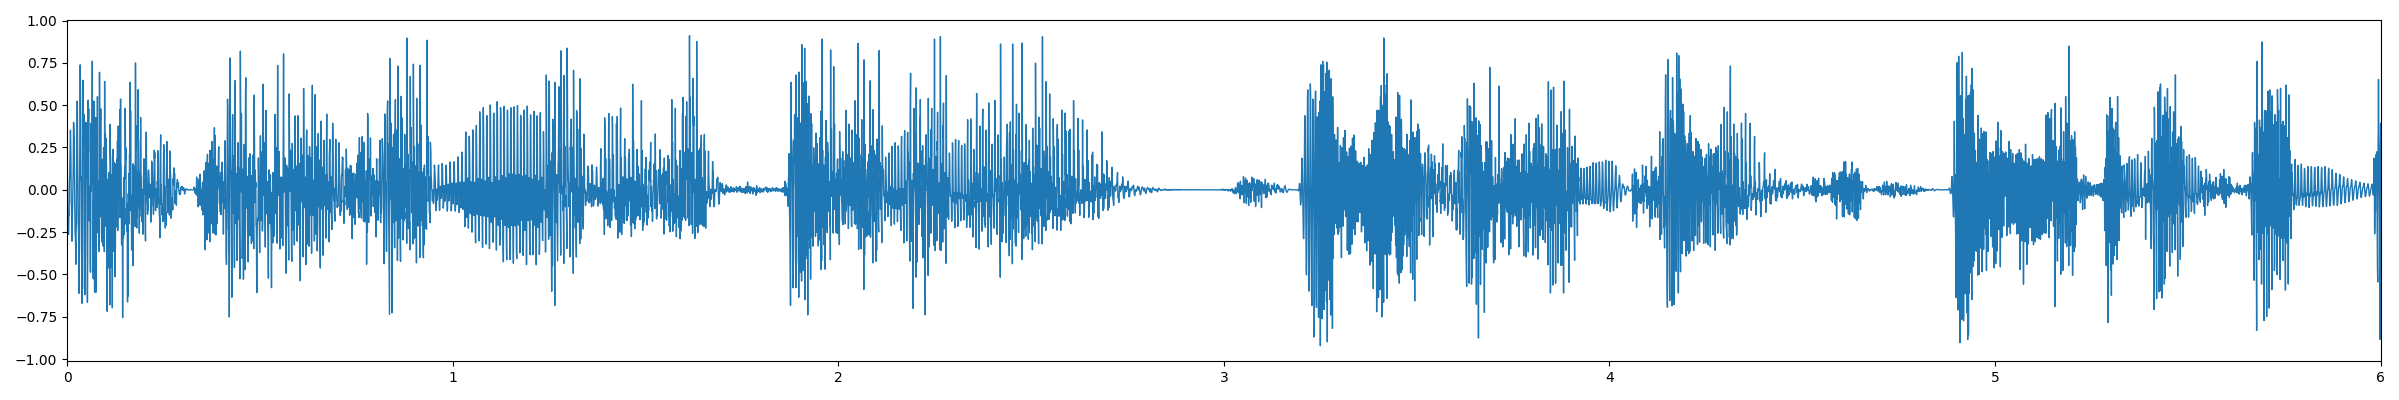

In [3]:
samp = Sample("/home/em/Lib/snd/samples/speech/voiceover-fragment.flac")[:6]
samp

In [4]:
winsize = 80
s = pt.Spectrum.analyze(samp.samples, sr=samp.sr, resolution=50, windowsize=winsize, hoptime=1/(winsize*4), freqdrift=30, minbreakpoints=1)
s

Spectrum(numpartials=26692, start=0.002, end=6.000, density=51601.4)

In [5]:
s2, s2noise = s.filter(mindb=-80, maxfreq=8000)

In [6]:
res = s2.splitInTracks(maxtracks=4, maxrange=24, noisetracks=3, distribution=0.9, minbreakpoints=2, numbands=3, debug=False)
# sp2 = pt.Spectrum(res.partials())
# print(sp2)
print(len(res.voicedPartials()), res)


156 SplitResult(tracks: 4, noisetracks: 3, residual: 9909 partials)


In [7]:
voiced = res.voicedSpectrum()
noise = res.noiseSpectrum()
total = voiced + noise
print(total)
total.play()

Spectrum(numpartials=345, start=0.005, end=5.999, density=1893.7)


created pipewire module
--Csound version 7.0 (double samples) Aug 10 2025
[commit: 66e8fbbdfe40d65ff960bc4ce2d9691382237cc2]
libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

Synth(‖ .playPartials=401.0002 start=.147 dur=-1 ifn=101 iskip=0 inumrows=4002 inumcols=34 kspeed=1 kloop=0 kminfreq=0 kmaxfreq=0 iflags=6 istart=0 istop=0 kfreqscale=1 ichan=1 kbwscale=1 kgain=1 iposition=0 kfreqoffset=0 kminbw=0 kmaxbw=1 kminamp=0)

qt.qpa.wayland: There are no outputs - creating placeholder screen


[maelzel.scoring:spanner.py:167:markSpannerNestingLevel:ERROR] No end spanner found for Slur(kind=start, linetype=solid, nestingLevel=1, parent=3Eb-07:gliss, uuid=sgt4cwyz), openSpannersByClass={<class 'maelzel.scoring.spanner.Slur'>: ['sgt4cwyz']}


Score(7 voices)
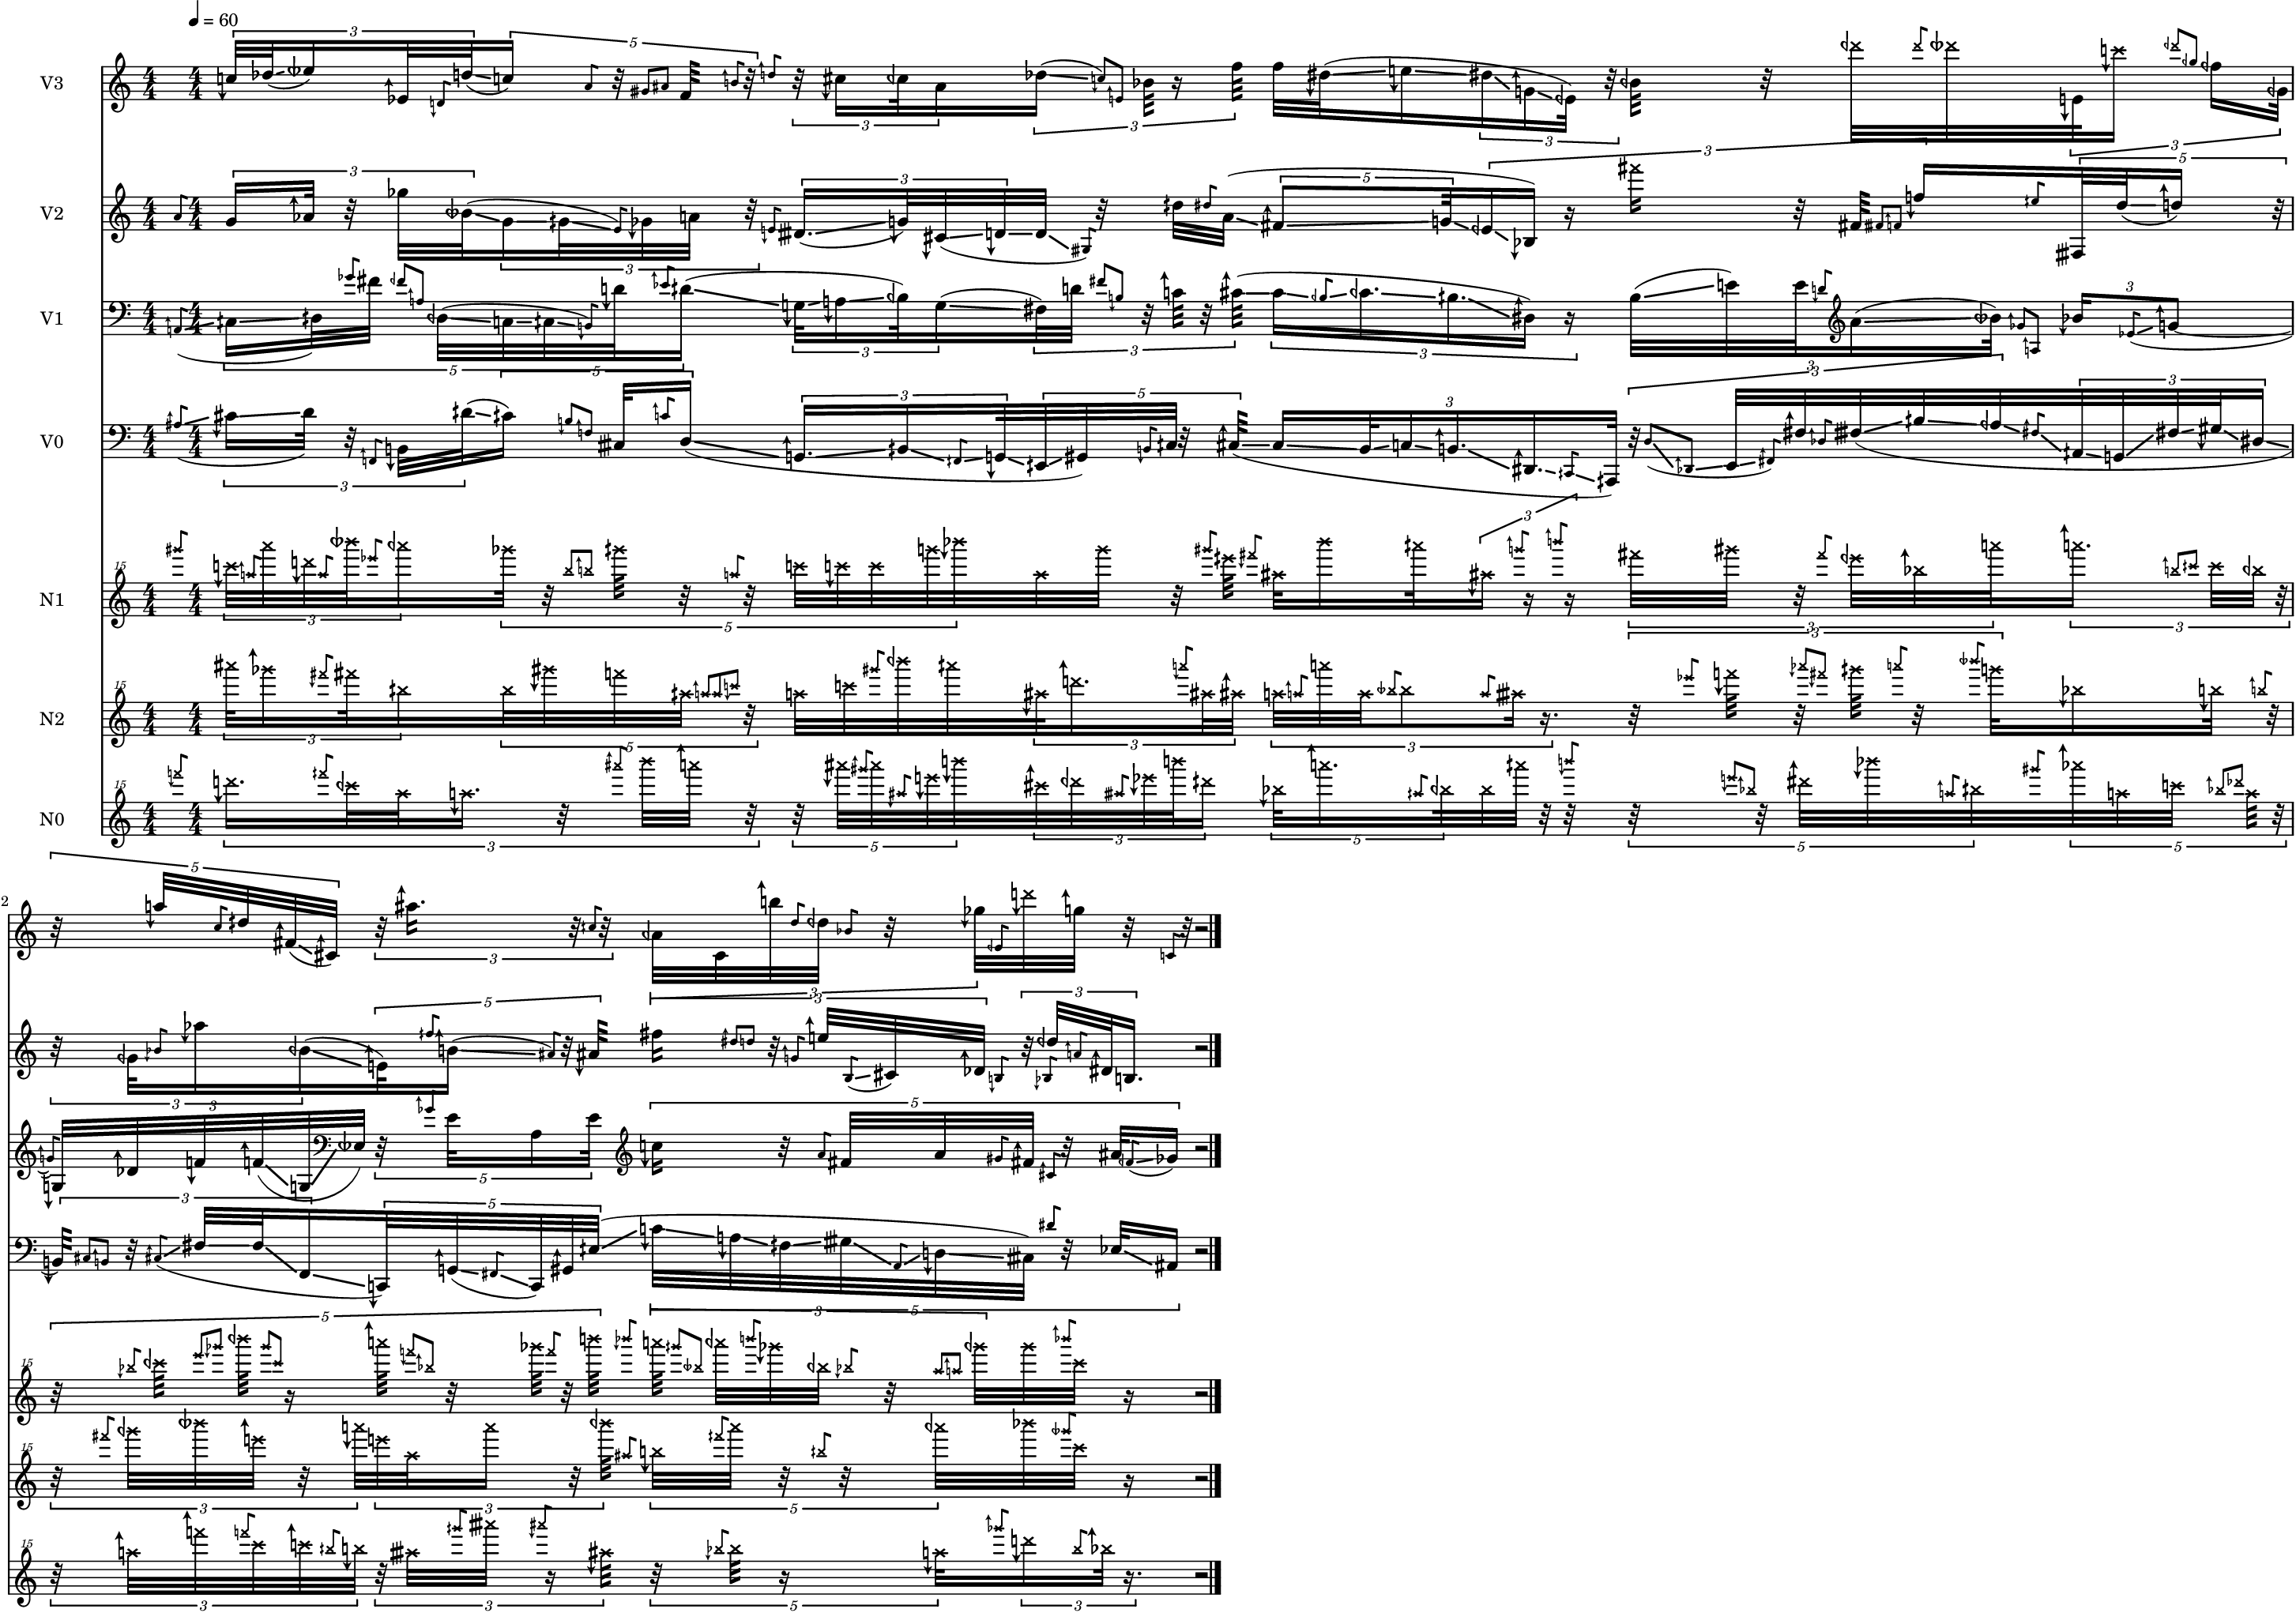

In [10]:
options = trsp.TranscriptionOptions(addGliss=True, addSlurs=True, simplify=0.1, debug=False)

cfg = CoreConfig()
cfg['quant.complexity'] = 'low'
cfg['show.centsAsText'] = False
cfg.activate()

sco = trsp.transcribeTracks(res.tracks, res.noisetracks, options=options)
# r = sco.quantizedScore()
sco

In [11]:
sco.play(gain=2)

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=345)
    Synth(‖ preset:.piano=401.0005 start=32.26 dur=.047 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=71.8095 p21=0.00640138 p22=0.0473166 p23=71.8095 …)
    Synth(‖ preset:.piano=401.0006 start=32.315 dur=.247 kpos=0.5 kgain=2 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=72.9002 p21=0.00911552 p22=0.0912819 p23=74.5393 …)
    Synth(‖ preset:.piano=401.0007 start=32.592 dur=.019 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.0189765 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=63.2071 p21=0.00421322 p22=0.0189765 p23=63.2071 …)
    Synth(‖ preset:.piano=401.0008 start=32.621 dur=.012 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.0118686 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=61.6627 p21=0.00327265 p22=0.0118686 p23=61.6627 …)
    Synth(‖ preset:.piano=401.0009 start=32.649 dur=.281 kpos=0.5 kgain=2 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=73.9728 p21=0.00344947 p22=0.0978253 p23=72.0233 …)
    Synth(‖ preset:.piano=401.001 start=32.943 dur=.02 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=68.899 p21=0.00431644 p22=0.0204855 p23=68.899 …)
    Synth(‖ preset:.piano=401.0011 start=32.997 dur=.05 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=68.3983 p21=0.00310075 p22=0.0495672 p23=68.3983 …)
    Synth(‖ preset:.piano=401.0012 start=33.048 dur=.01 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.00965193 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=70.0487 p21=0.00691575 p22=0.00965193 p23=70.0487 …)
    Synth(‖ preset:.piano=401.0013 start=33.059 dur=.035 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=65.0557 p21=0.0107218 p22=0.0348046 p23=65.0557 …)
    Synth(‖ preset:.piano=401.0014 start=33.114 dur=.056 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=71.1665 p21=0.0233936 p22=0.0561481 p23=71.1665 …)
    Synth(‖ preset:.piano=401.0015 start=33.201 dur=.068 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=74.265 p21=0.000528678 p22=0.0682266 p23=74.265 …)
    Synth(‖ preset:.piano=401.0016 start=33.292 dur=.183 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=72.7963 p21=0.00519964 p22=0.183257 p23=72.7963 …)
    Synth(‖ preset:.piano=401.0017 start=33.502 dur=.077 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=71.5878 p21=0.0585555 p22=0.0774421 p23=71.5878 …)
    Synth(‖ preset:.piano=401.0018 start=33.596 dur=.142 kpos=0.5 kgain=2 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=70.0817 p21=0.0196233 p22=0.141537 p23=70.0817 …)
    Synth(‖ preset:.piano=401.0019 start=33.744 dur=.162 kpos=0.5 kgain=2 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=72.9058 p21=0.0190983 p22=

In [12]:
qs = sco.quantizedScore()
sco2 = qs.coreScore()

[maelzel.scoring:spanner.py:167:markSpannerNestingLevel:ERROR] No end spanner found for Slur(kind=start, linetype=solid, nestingLevel=1, parent=3Eb-07:gliss, uuid=sgt4cwyz), openSpannersByClass={<class 'maelzel.scoring.spanner.Slur'>: ['sgt4cwyz']}


In [21]:
from maelzel.core.offline import render

with play() as r:
    sco.play(position=0)
    sco2.play(position=1)
r

Button(description='Stop', style=ButtonStyle())

Output()

In [17]:
sco.play(position=0)
sco2.play(position=1)

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=336)
    Synth(‖ preset:.piano=401.3083 start=173.289 dur=.083 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=71.81 p21=0.515178 p22=0.0833333 p23=71.81 …)
    Synth(‖ preset:.piano=401.3084 start=173.372 dur=.25 kpos=1 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=72.9 p21=0.515178 p22=0.0833333 p23=74.54 …)
    Synth(‖ preset:.piano=401.3085 start=173.622 dur=.042 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=63.21 p21=0.515178 p22=0.0416667 p23=63.21 …)
    Synth(‖ preset:.piano=401.3086 start=173.664 dur=.042 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=61.66 p21=0.515178 p22=0.0416667 p23=61.66 …)
    Synth(‖ preset:.piano=401.3087 start=173.705 dur=.212 kpos=1 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=73.97 p21=0.515178 p22=0.0833333 p23=72.02 …)
    Synth(‖ preset:.piano=401.3088 start=173.917 dur=.071 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=68.9 p21=0.515178 p22=0.0714286 p23=68.9 …)
    Synth(‖ preset:.piano=401.3089 start=174.022 dur=.033 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=68.4 p21=0.515178 p22=0.0333333 p23=68.4 …)
    Synth(‖ preset:.piano=401.309 start=174.055 dur=.033 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=70.05 p21=0.515178 p22=0.0333333 p23=70.05 …)
    Synth(‖ preset:.piano=401.3091 start=174.089 dur=.05 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=65.06 p21=0.515178 p22=0.05 p23=65.06 …)
    Synth(‖ preset:.piano=401.3092 start=174.139 dur=.05 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=71.17 p21=0.515178 p22=0.05 p23=71.17 …)
    Synth(‖ preset:.piano=401.3093 start=174.239 dur=.05 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=74.27 p21=0.515178 p22=0.05 p23=74.27 …)
    Synth(‖ preset:.piano=401.3094 start=174.372 dur=.167 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=72.8 p21=0.515178 p22=0.166667 p23=72.8 …)
    Synth(‖ preset:.piano=401.3095 start=174.539 dur=.083 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=71.59 p21=0.515178 p22=0.0833333 p23=71.59 …)
    Synth(‖ preset:.piano=401.3096 start=174.622 dur=.167 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=70.08 p21=0.515178 p22=0.166667 p23=70.08 …)
    Synth(‖ preset:.piano=401.3097 start=174.789 dur=.111 kpos=1 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=72.91 p21=0.515178 p22=0.0555556 p23=71.86 …)
    Synth(‖ preset:.piano=401.3098 start=174.9 dur=.056 kpos=1 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 

In [ ]:
rec0